In [1]:
segVars <- c("age", "gender", "income", "kids", "ownHome", "subscribe")
segVarType <- c("norm", "binom", "norm", "pois", "binom", "binom")
segNames <- c("Suburb mix", "Urban hip", "Travelers", "Moving up")
segSize <- c(100, 50, 80, 70)

In [2]:
segMeans <- matrix( c(
    40, 0.5, 55000, 2, 0.5, 0.1,
    24, 0.7, 21000, 1, 0.2, 0.2,
    58, 0.5, 64000, 0, 0.7, 0.05,
    36, 0.3, 52000, 2, 0.3, 0.2  ), ncol=length(segVars), byrow=TRUE)

In [4]:
# standard deviations for each segment (NA = not applicable for the variable)
segSDs <- matrix( c(
    5, NA, 12000, NA, NA, NA,
    2, NA,  5000, NA, NA, NA,
    8, NA, 21000, NA, NA, NA,
    4, NA, 10000, NA, NA, NA  ), ncol=length(segVars), byrow=TRUE)

In [14]:
seg.df = NULL
set.seed(02554)
for (i in seq_along(segNames)) {
    cat(i, segNames[i], '\n')
    this.seg = data.frame(matrix(NA, nrow=segSize[i], ncol=length(segVars)))
    
    for (j in seq_along(segVars)) {
        if (segVarType[j]=='norm') {
            this.seg[,j] = rnorm(segSize[i], mean=segMeans[i, j], sd=segSDs[i, j])
        } 
        else if (segVarType[j] == "pois") {
            this.seg[, j] <- rpois(segSize[i], lambda=segMeans[i, j])
        }
        else if (segVarType[j] == "binom") {
            this.seg[, j] <- rbinom(segSize[i], size=1, prob=segMeans[i, j])
        }
        else {
            stop("Bad segment data type: ", segVarType[j])
        }
    }
    seg.df <- rbind(seg.df, this.seg)
}

1 Suburb mix 
2 Urban hip 
3 Travelers 
4 Moving up 


In [15]:
# make the data frame names match what we defined
names(seg.df) <- segVars
# add segment membership for each row
seg.df$Segment   <- factor(rep(segNames, times=segSize))
# convert the binomial variables to nicely labeled factors
seg.df$ownHome   <- factor(seg.df$ownHome, labels=c("ownNo", "ownYes"))
seg.df$gender    <- factor(seg.df$gender, labels=c("Female", "Male"))
seg.df$subscribe <- factor(seg.df$subscribe, labels=c("subNo", "subYes"))

In [16]:
summary(seg.df)

      age           gender        income            kids        ownHome   
 Min.   :19.26   Female:157   Min.   : -5183   Min.   :0.00   ownNo :159  
 1st Qu.:33.01   Male  :143   1st Qu.: 39656   1st Qu.:0.00   ownYes:141  
 Median :39.49                Median : 52014   Median :1.00               
 Mean   :41.20                Mean   : 50937   Mean   :1.27               
 3rd Qu.:47.90                3rd Qu.: 61403   3rd Qu.:2.00               
 Max.   :80.49                Max.   :114278   Max.   :7.00               
  subscribe         Segment   
 subNo :260   Moving up : 70  
 subYes: 40   Suburb mix:100  
              Travelers : 80  
              Urban hip : 50  
                              
                              

In [18]:
save(seg.df, file="segdf-Rintro-Ch5.RData")

In [19]:
aggregate(seg.df$income, list(seg.df$Segment), mean)

Group.1        x
1  Moving up 53090.97
2 Suburb mix 55033.82
3  Travelers 62213.94
4  Urban hip 21681.93

In [20]:
# seg.income.mean <- aggregate(seg.df$income, list(seg.df$Segment), mean)
# seg.df$segIncome <- seg.income.mean[seg.df$Segment, 2]
aggregate(income ~ Segment, data=seg.df, mean)

Segment   income
1  Moving up 53090.97
2 Suburb mix 55033.82
3  Travelers 62213.94
4  Urban hip 21681.93

In [22]:
aggregate(income ~ Segment + ownHome, data=seg.df, mean)

Segment ownHome   income
1  Moving up   ownNo 54497.68
2 Suburb mix   ownNo 54932.83
3  Travelers   ownNo 63188.42
4  Urban hip   ownNo 21337.59
5  Moving up  ownYes 50216.37
6 Suburb mix  ownYes 55143.21
7  Travelers  ownYes 61889.12
8  Urban hip  ownYes 23059.27

In [23]:
with(seg.df, table(Segment, ownHome))

            ownHome
Segment      ownNo ownYes
  Moving up     47     23
  Suburb mix    52     48
  Travelers     20     60
  Urban hip     40     10

In [24]:
with(seg.df, table(kids, Segment))

    Segment
kids Moving up Suburb mix Travelers Urban hip
   0        13         11        80        17
   1        17         36         0        17
   2        18         22         0        11
   3        13         19         0         4
   4         5          7         0         1
   5         3          3         0         0
   6         0          2         0         0
   7         1          0         0         0

In [26]:
xtabs(kids ~ Segment, data=seg.df)

Segment
 Moving up Suburb mix  Travelers  Urban hip 
       134        192          0         55 

In [27]:
aggregate(kids ~ Segment, data=seg.df, sum)

Segment kids
1  Moving up  134
2 Suburb mix  192
3  Travelers    0
4  Urban hip   55

In [28]:
seg.tab <- with(seg.df, table(kids, Segment))
apply(seg.tab*0:7, 2, sum)

Moving up Suburb mix  Travelers  Urban hip 
       134        192          0         55

In [29]:
colSums(seg.tab*0:7)

Moving up Suburb mix  Travelers  Urban hip 
       134        192          0         55

Loading required package: lattice


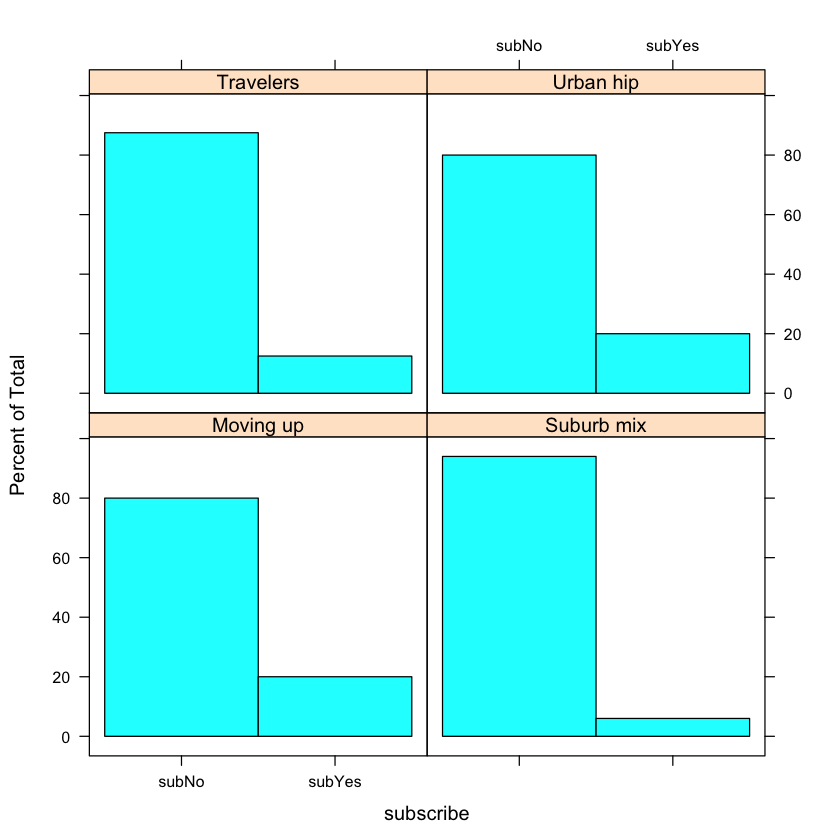

In [32]:
require(lattice)
histogram(~subscribe | Segment, data=seg.df)

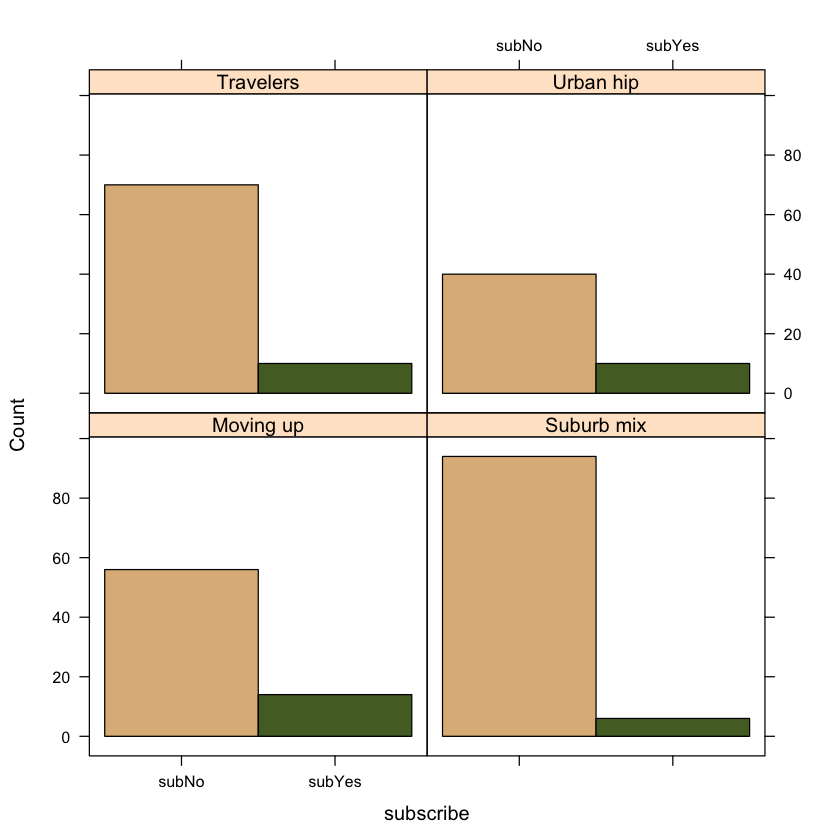

In [39]:
histogram(~subscribe | Segment, data=seg.df, type="count", # layout=c(4,1), 
          col=c("burlywood", "darkolivegreen"))

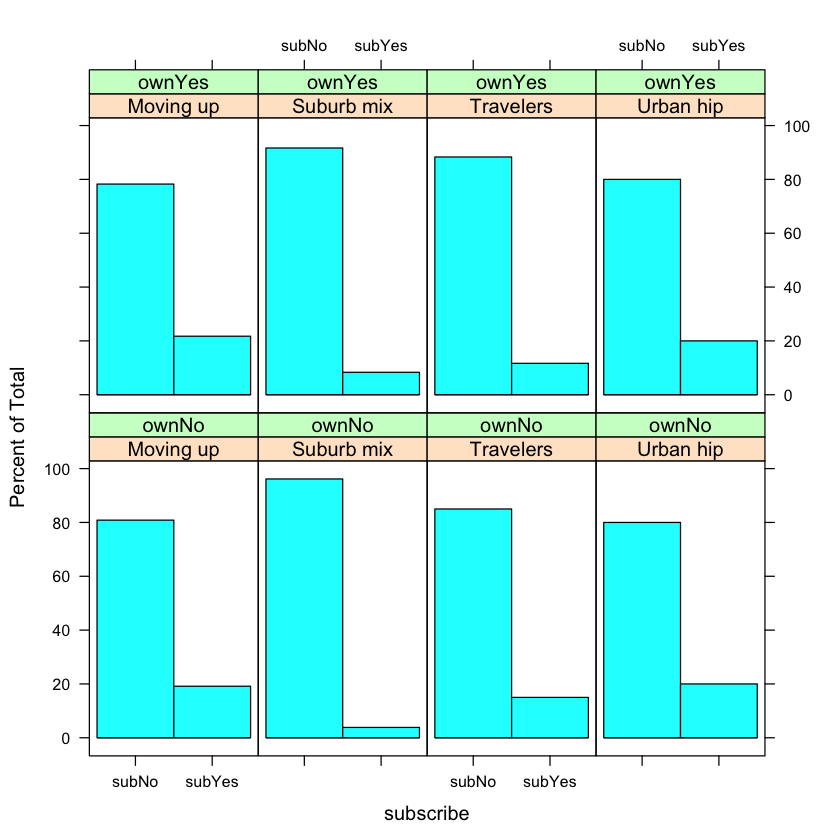

In [38]:
histogram(~subscribe | Segment + ownHome, data=seg.df)

If you wrap prop.table(..., margin= ...) around a regular table() command, it will give you the proportions for each cell with respect to the entire table (by default), or just the rows (margin=1), or the columns (margin=2).

In [40]:
prop.table(table(seg.df$subscribe, seg.df$Segment), margin=2)

        
         Moving up Suburb mix Travelers Urban hip
  subNo      0.800      0.940     0.875     0.800
  subYes     0.200      0.060     0.125     0.200

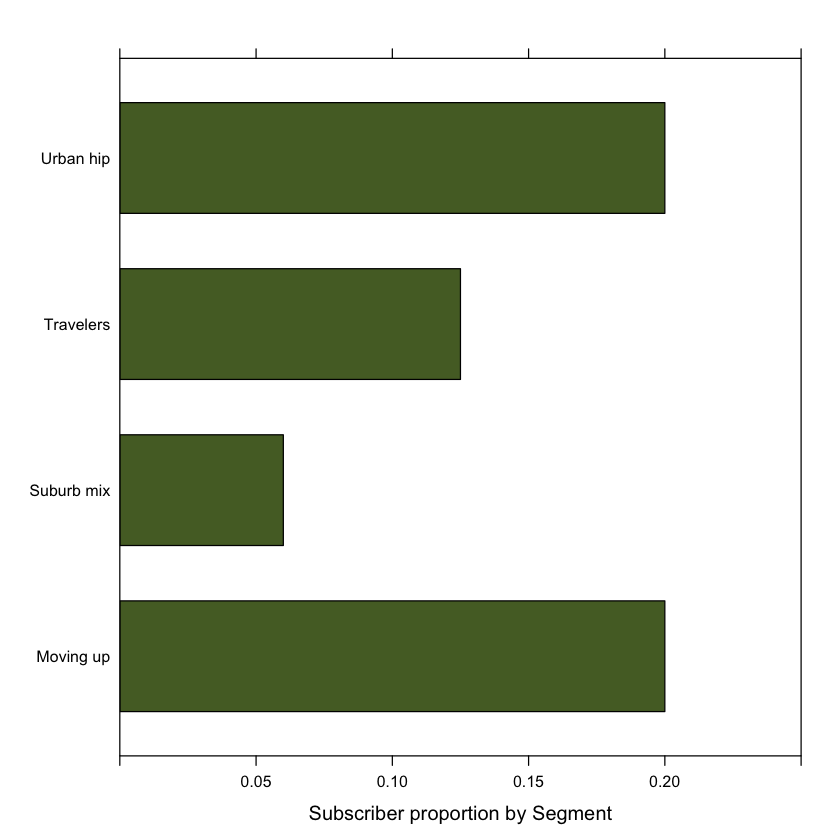

In [43]:
barchart(prop.table(table(seg.df$subscribe, seg.df$Segment), margin=2)[2,], xlim=c(0, 0.25),
        xlab='Subscriber proportion by Segment', col='darkolivegreen')

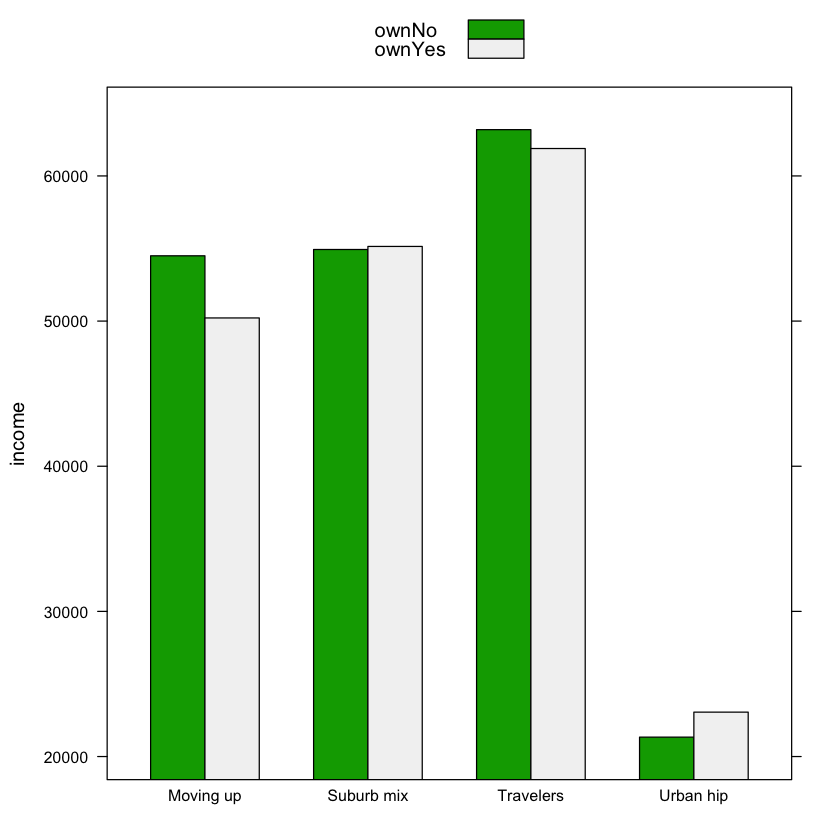

In [44]:
seg.income.agg <- aggregate(income ~ Segment + ownHome, data=seg.df, mean) 
barchart(income ~ Segment, data=seg.income.agg,
         groups=ownHome, auto.key=TRUE,
         par.settings = simpleTheme(col=terrain.colors(2)) )

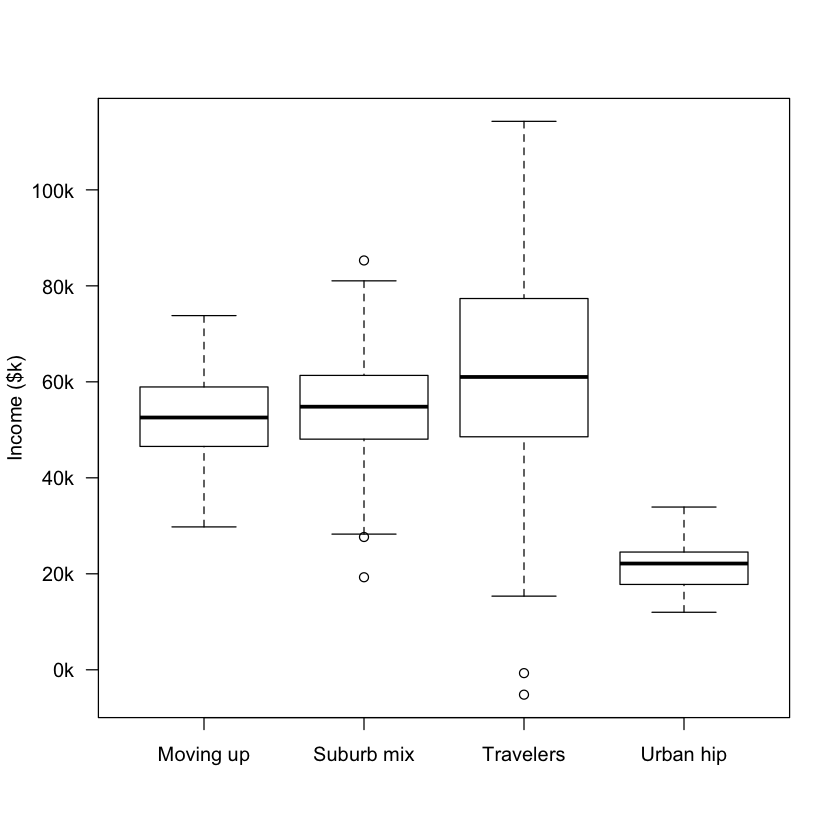

In [46]:
boxplot(income ~ Segment, data=seg.df, yaxt="n", ylab="Income ($k)")
ax.seq <- seq(from=0, to=120000, by=20000)
axis(side=2, at=ax.seq, labels=paste(ax.seq/1000, "k", sep=""), las=1)

One point of caution is that bwplot() uses the model formula in a direction opposite than you might expect; you write Segment ∼ income.

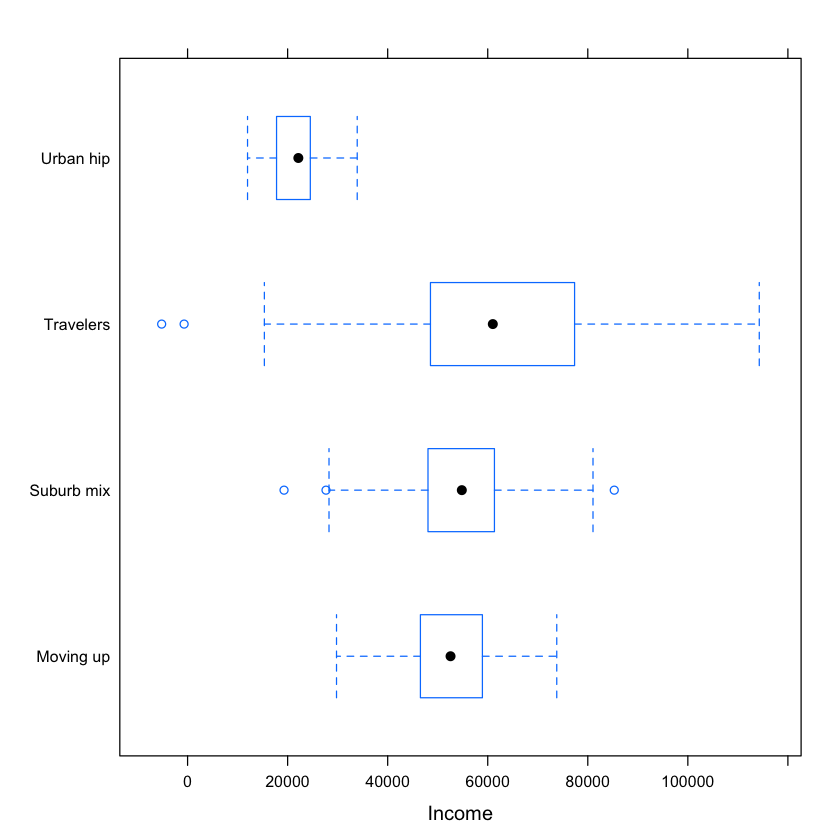

In [47]:
bwplot(Segment ~ income, data=seg.df, horizontal=TRUE, xlab = "Income")

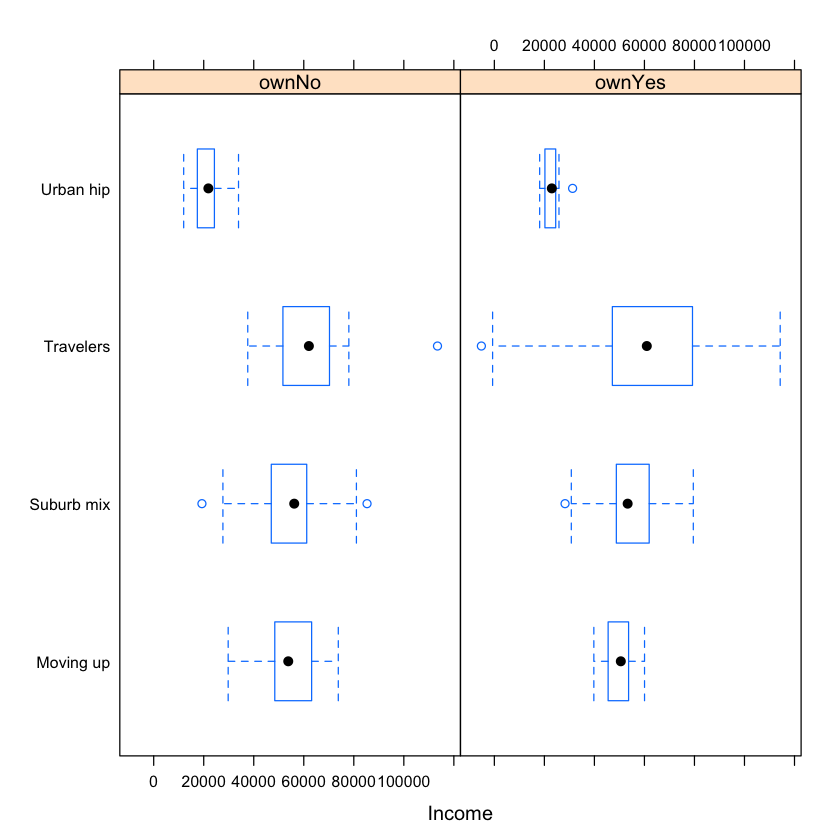

In [48]:
bwplot(Segment ~ income | ownHome, data=seg.df, horizontal=TRUE, xlab="Income")

In R code in general:
- When writing for() loops, use seq along() instead of 1:length()
(Sect. 5.1.2)
- For if() and for() blocks, always use brackets (“{” and “}”) for improved
readability and reliability (Sect. 5.1.3)
- When creating a data object froms cratch,pre-populate it with missing data(NA)
and then fill it in, for speed and reliability (Sect. 5.1.1) 

When describing and visualizing data for groups:

- The by() command can split up data and automatically apply functions such as mean() and summary() (Sect. 5.2)
- aggregate()isevenmorepowerful:itunderstandsformulamodelsandpro- duces a reusable, indexable object with its results (Sects. 5.2 and 5.2.1)
- Frequency of occurrence can be found with table(). For count data, espe- cially when using formulas, xtabs() is useful (Sect. 5.2.2)
- Charts of proportions and occurrence by a factor are well suited to the lattice package histogram() command (Sect. 5.2.2)
- Plots for continuous data by factor may use barchart(), or even better, box- and-whiskers plots with boxplot(). The lattice package extends such plots to multiple factors using formula specification and the bwplot() com- mand (Sect. 5.2.4)